# K-Means Clustering with Scikit-Learn


K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances. For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps:

(i) Find the Euclidean distance between each data instance and centroids of all the clusters;

(ii) Assign the data instances to the cluster of the centroid with nearest distance;

(iii) Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.

A Simple Example
--------------------------
Let's try to see how the K-means algorithm works with the help of a handcrafted example, before implementing the algorithm in Scikit-Learn.

We have a set of the following two dimensional data instances named D.

In [1]:
D = { (5,3), (10,15), (15,12), (24,10), (30,45), (85,70), (71,80), (60,78), (55,52), (80,91) }  

# We want to divide this data into two clusters, 
# C1 and C2 based on the similarity between the data points.

The first step is to randomly initialize values for the **centroids** of both clusters. Let's name centroids of clusters C1 and C2 as c1 and c2 and initialize them with the values of the first two data points 
i.e. **(5, 3)** and **(10, 15)**.

[![image](https://www.linkpicture.com/q/Itr1.png)](https://www.linkpicture.com/view.php?img=LPic62eb79d548864227917339)

After assigning data points to the corresponding clusters, the next step is to calculate the new centroid values. These values are calculated by finding the means of the coordinates of the data points that belong to a particular cluster.

For cluster C1, there is currently only one point i.e. (5,3), therefore the mean of the coordinates remain same and the new centroid value for c1 will also be (5,3).

For C2, there are currently 9 data points. We name the coordinates of data points as x and y. The new value for x coordinate of centroid c2 can be calculated by determining the mean of x coordinates of all 9 points that belong to cluster C2 as given below:

c2(x) = (10 + 15 + 24 + 30 + 85 + 71 + 60 + 55 + 80) / 9 = 47.77  
The new value for y coordinate of centroid c2 can be calculated by determining the mean of all y coordinates of all 9 points that belong to cluster C2.

c2(y) = (15 + 12 + 10 + 45 + 70 + 80 + 78 + 52 + 91) / 9 = 50.33  

**The updated centroid value for c2 will now be {47.77, 50.33}.

For the next iteration, the new centroid values for c1 and c2 will be used and the whole process will be repeated. The iterations continue until the centroid values stop updating.

[![image](https://www.linkpicture.com/q/Itr-2.png)](https://www.linkpicture.com/view.php?img=LPic62eb7a2134ca8538756480)

c1(x) = (5, 10, 15, 24) / 4 = 13.5  
c1(y) = (3, 15, 12, 10) / 4 = 10.0 
**Updated c1 to be (13.5, 10.0).

c2(x) = (30 + 85 + 71 + 60 + 55 + 80) / 6 = 63.5  
c2(y) = (45 + 70 + 80 + 78 + 52 +91) / 6 = 69.33  
**Updated c2 to be (63.5, 69.33).

[![image](https://www.linkpicture.com/q/itr3.png)](https://www.linkpicture.com/view.php?img=LPic62eb7a2134ca8538756480)

c1(x) = (5, 10, 15, 24, 30) / 5 = 16.8

c1(y) = (3, 15, 12, 10, 45) / 5 = 17.0

**Updated c1 to be (16.8, 17.0).

c2(x) = (85 + 71 + 60 + 55 + 80) / 5 = 70.2

c2(y) = (70 + 80 + 78 + 52 + 91) / 5 = 74.2

**Updated c2 to be (70.2, 74.2).

[![image](https://www.linkpicture.com/q/Kmeans-Iteration_4.png)](https://www.linkpicture.com/view.php?img=LPic62eb612cb2202690584140)

At the end of fourth iteration, the updated values of C1 and C2 are same as they were at the end of the third iteration. This means that data cannot be clustered any further. c1 and c2 are the centroids for C1 and C2. To classify a new data point, the distance between the data point and the centroids of the clusters is calculated. Data point is assigned to the cluster whose centroid is closest to the data point.

# K-means Clustering with Scikit-Learn
Now that we know how the K-means clustering algorithm actually works, let's see how we can implement it with Scikit-Learn.

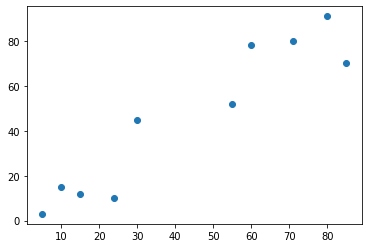

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

# prepare the data that we want to cluster
X = np.array([
     [5 , 3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

#visulaize the Data using Scatter Plot 
plt.scatter(X[:,0], X[:,1], label ="True Position", )
plt.show()

# Executing Algorith with Two Clusters

In [3]:
from sklearn.cluster import KMeans 

3 # create clusters. Assume with no.of clusters =2 
kmeans = KMeans (n_clusters =2 )
kmeans.fit (X)

print (kmeans.cluster_centers_)

[[16.8 17. ]
 [70.2 74.2]]


Here the first row contains values for the coordinates of the first centroid i.e. (16.8 , 17) and the second row contains values for the coordinates of the other centroid i.e. (70.2, 74.2). You can see that these values are similar to what we calculated manually for centroids c1 and c2 in the last section.

In [4]:
# To see the labels for the data point, -> use labels_ attribute

kmeans.labels_

# The output is a one dimensional array of 10 elements corresponding 
# to the clusters assigned to our 10 data points.

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Here the first five points have been clustered together and the last five points have been clustered. Here 0 and 1 are merely used to represent cluster IDs and have no mathematical significance.

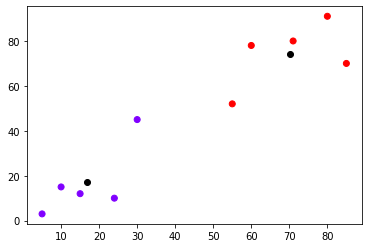

In [5]:
# Let's plot the data points again on the graph and 
# visualize how the data has been clustered.

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,  cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black'); 

# Executing Algorith with Three Clusters

In [6]:
from sklearn.cluster import KMeans 

kmeans = KMeans (n_clusters =3)# creating object with three clusters
kmeans.fit (X)
print (kmeans.cluster_centers_) #Printing Clutser Centers

[[74.   79.75]
 [13.5  10.  ]
 [42.5  48.5 ]]


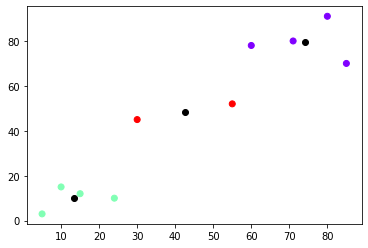

In [7]:
plt.scatter (X[:,0], X[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black") 

In the same way we can create any no.of clusters.

# Analysing Mall Customers based on their Salary And Spending Score

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/venkatshan707/Data_Science_with_Python/main/K-Means%20Clustering/Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.groupby("Gender").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


We could see Mens having slightly high tendency of Savings than womens

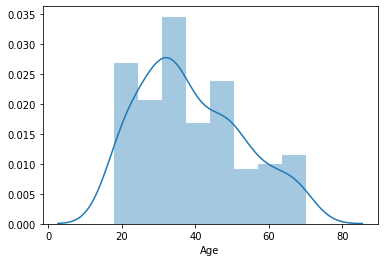

In [15]:
sns.distplot(df['Age'])

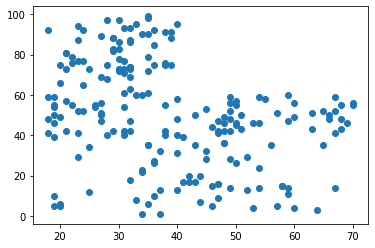

In [16]:
plt.scatter (df['Age'], df['Spending Score (1-100)'])

Here we can clearly see that people below 40 age are spending more that older people

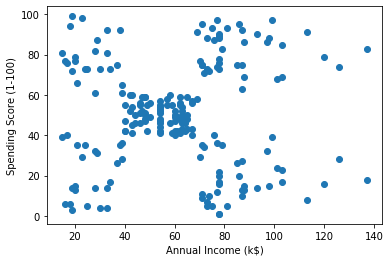

In [17]:
plt.scatter (df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()

Above we can find approximately 5 clusters of people with Annual Income (k$) and Spending Score (1-100) spending score Features. Lets do future analysis with these two features seperately.

In [18]:
X= df.iloc[:,[3,4]].values  # Lets take these two variables in variabled called X
X
#It's an numpy array. we can use it while plotting

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Finding Possibility to have Clutser - Hopkins Statistics

We know how to create clusters. But how we can get know whether there is possibility to forming clusters on our data or not ?. This can be done by using  __Hopkins Statistics__. This tells how differnet our data is from randomly scattered data.

In [19]:
X1= df.iloc[:, [3,4]]
#Creating new variable X1 beacuse, method "hopkins()" won't support numpy array

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(X1) # It tells everytime differnet value. To to get the better unbderstansing we are going with the mean value of this

0.7819542994896855

In [22]:
hopkin_avg= []

In [23]:
for i  in range (100):
    hopkin_avg.append(hopkins(X1))

In [24]:
print("Average Hopkin value: ", np.sum (hopkin_avg)/len(hopkin_avg))

Average Hopkin value:  0.7592923359661755


How different is your data from randomly scattered distribution.

Our data is **76 %** different from randomly scattered distribution.

Higher the value you get from Hopkin's test, greater are the chances of clusters to be found.

If the value is between 0.01 to 0.3, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between 0.7 to 0.999, it has a high tendancy to cluster.

##### From the above Analysis we can see there is a good probability of having clusters in our Data. So let's create clusters

## Creating a Model with Three clusters

In [25]:
kmeans= KMeans (n_clusters= 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.cluster_centers_ # getting cluster centers

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [27]:
lab = kmeans.labels_
# To see the labels for the data point, -> we used labels_ attribute
print(lab, end = '\n\n' )
# The output is a one dimensional array of 200 elements corresponding 
# to the clusters assigned to our 200 data points.
print("num_of_zeros", (lab == 0).sum())
print("num_of_ones",(lab == 1).sum())
print("num_of_twos",(lab == 2).sum())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]

num_of_zeros 38
num_of_ones 123
num_of_twos 39


Here 0, 1 and 2 are merely used to represent cluster IDs and have no mathematical significance.

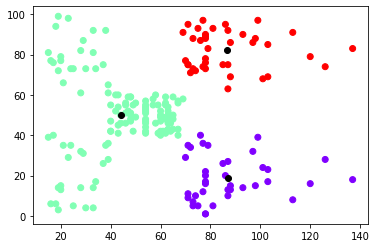

In [28]:
#lets visulaize three clusters with scatter plot

plt.scatter (X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow') # Using numpy array X
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black'); 

We have created 3 Clusters and it looks good. But we can get doubt like why can't it can be 4 or or more. or why not 2. To avoid this confusion and to get better idea on how many clusters to be formed, we are using method Callled **Elbow Method**

## Elbow Method

In [29]:

from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# Appending interia values. These values tells what is the sum of squared distance
    #between points with their respective centroids on particular number of clusters

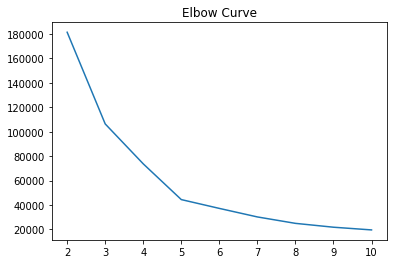

In [30]:
#Plotting Inertia Value
plt.plot(range(2,11), wcss)
plt.title("Elbow Curve")
plt.show()

From the above graph we can see that, after 5 clusters the steepnes is not varying that much. And Elbow Formed at number 5. So, it's good to go with 5 clusters. 

## Silhoutte Analysis

In [57]:
from sklearn.metrics import silhouette_score

In [60]:
sse= []
for k in range (2, 15):
    kmeans = KMeans(n_clusters =k).fit (X)
    sse.append([k, silhouette_score(X, kmeans.labels_)])

In [61]:
sse

[[2, 0.2968969162503008],
 [3, 0.46761358158775435],
 [4, 0.4931963109249047],
 [5, 0.553931997444648],
 [6, 0.5379675585622219],
 [7, 0.5270287298101395],
 [8, 0.455309461472565],
 [9, 0.4563032021725485],
 [10, 0.4509237544334418],
 [11, 0.43478153218902854],
 [12, 0.4355277383491917],
 [13, 0.41582502197212207],
 [14, 0.42400390907137625]]

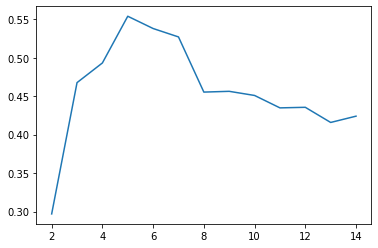

In [65]:
plt.plot((pd.DataFrame(sse)[0]), pd.DataFrame(sse)[1])
plt.show()

From the Silhouette Analysis as well, we can find the value 5 is getting the higest Silhouette score. So, it's good to create 5 clusters on our data.

# Creating 5 Clusters on our data

In [31]:
kmeans= KMeans (n_clusters= 5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

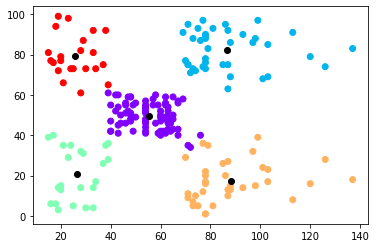

In [32]:
#lets visulaize three clusters with scatter plot

plt.scatter (X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow') # Using numpy array X
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black'); 

From the above plot we can see 5 clusters. We can name them as below. And based on the Business call we can give more offers/facilities to them.

cluster 1: People with **Low Salaray -Low Spending Score.** 

Cluster 2 :People with **Low Salaray -High Spending Score.** 

cluster 3: People with **Medium Salaray -Medium Spending Score.** 

cluster 4: People with **Hign Salaray -Low Spending Score.** 

cluster 5: People with **High Salaray -High Spending Score.** 

In [33]:
type(X1)

pandas.core.frame.DataFrame

In [34]:
type (X)

numpy.ndarray

In [35]:
X1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Now we are going to add respective cluster labels for each record, so that we can easily say which record belongs to which clutser.

In [36]:
X1['labels_5'] = kmeans.labels_
X1.head()

,Annual Income (k$),Spending Score (1-100),labels_5
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


We are getting clusters in the plot only with color difference but with out any names. If we want to talk about one cluster, it's difficult to call that clutser as no name assigned for that. To avoid this we are going to give names for each clutser( With the help of the scatteplot method from Seaborn). We have to  give DataFraame as input to the Scatterplot method. 

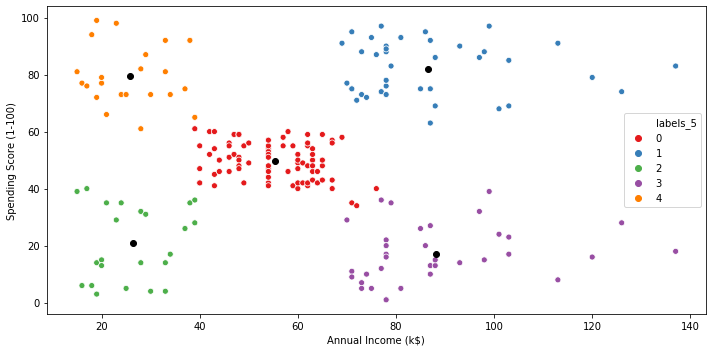

In [37]:
plt.figure(figsize = (10,5))
sns.scatterplot(x= "Annual Income (k$)", y= "Spending Score (1-100)", hue ='labels_5',  data =X1, palette = 'Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black'); 
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.tight_layout()

We are going see mean of each clusters Avg Income and spending score

In [38]:
X1[['Annual Income (k$)', 'Spending Score (1-100)', 'labels_5']].groupby('labels_5').mean().sort_values(by = 'Spending Score (1-100)', ascending = False)
#Taken three columns and grouped by labels
#Found the mean of them and sorted in descending order as per "Spending Score (1-100)"

,Annual Income (k$),Spending Score (1-100)
labels_5,,
1,86.538462,82.128205
4,25.727273,79.363636
0,55.296296,49.518519
2,26.304348,20.913043
3,88.200000,17.114286


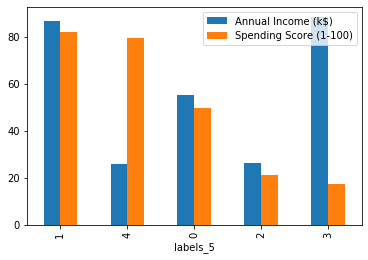

In [39]:
#Lets plot the above data in the barchart
X1[['Annual Income (k$)', 'Spending Score (1-100)', 'labels_5']].groupby('labels_5').mean().sort_values(by = 'Spending Score (1-100)', ascending = False).plot(kind= "bar")

#Just added plot(kind = 'bar')


we can see cluster 1 people is earning high and spending high. These people are the very valueable customers. 

In [40]:
#Lets take these people alone in the analysis
c1= X1[X1["labels_5"]==1]
c1

,Annual Income (k$),Spending Score (1-100),labels_5
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [41]:
c1.labels_5.value_counts()


1    39
Name: labels_5, dtype: int64

In [42]:
c1.sort_values(by=['Annual Income (k$)', 'Spending Score (1-100)'], ascending=[True, True]).head(15)
#Advanced Sorting on c1 data.

,Annual Income (k$),Spending Score (1-100),labels_5
123,69,91,1
125,70,77,1
129,71,75,1
131,71,75,1
127,71,95,1
133,72,71,1
137,73,73,1
135,73,88,1
139,74,72,1
141,75,93,1


# Hierarchical Clustering

In [43]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

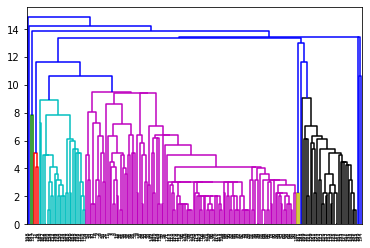

In [44]:
mergings = linkage (X1, method = "single", metric = "euclidean")
dendrogram (mergings)
plt.show ()

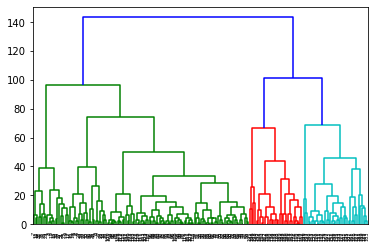

In [45]:
mergings = linkage (X1, method = "complete", metric = "euclidean") # Linkage will be done between two clusters in complete method.
#It is done based on minimal farthest distance between the two points of two different clusters across all other clutsers.

dendrogram (mergings)
plt.show () 


In [46]:
cut_tree (mergings, n_clusters = 5) # It will create 5 clutsers as per Mergings graph

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [47]:
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1,) # Reshaping the labels
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [48]:
X1['cluster_labels'] = cluster_labels # Assigning cluster lables to the Records
X1.head()


,Annual Income (k$),Spending Score (1-100),labels_5,cluster_labels
0,15,39,2,0
1,15,81,4,1
2,16,6,2,0
3,16,77,4,1
4,17,40,2,0


In [49]:
X1.labels_5.value_counts().sort_values(ascending=False)

0    81
1    39
3    35
2    23
4    22
Name: labels_5, dtype: int64

In [50]:
X1.cluster_labels.value_counts().sort_values(ascending=False)

2    85
3    39
4    32
0    23
1    21
Name: cluster_labels, dtype: int64

We could see K-means and Hierarchical Clustering both are clustered similarly with minimal no.of points difference between clusters. 

## Plots 

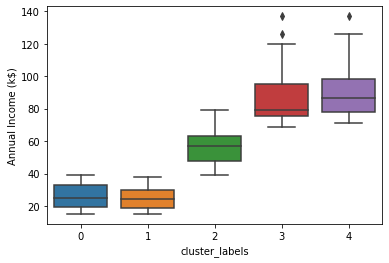

In [51]:
sns.boxplot(x='cluster_labels', y='Annual Income (k$)', data=X1);

We could see the outliers on the Annual Income field. Noteabley these people are in the High Annual Income clusters

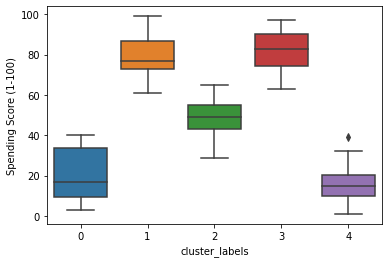

In [52]:
sns.boxplot(x='cluster_labels', y='Spending Score (1-100)', data=X1);

We could see all the five cluster's People Spending scores above. Cluster with High Annual Income and Low Spending have a outliers o0n spending score.